## How to import NumPy #

In [1]:
import numpy as np

This widespread convention allows access to NumPy features with a short,
recognizable prefix `np` while distinguishing NumPy features from others
that have the same name.

## Why use NumPy? #

Python lists are excellent, general-purpose containers. They can be
“heterogeneous”, meaning that they can contain elements of a variety of types,
and they are quite fast when used to perform individual operations on a handful
of elements.

Depending on the characteristics of the data and the types of operations that
need to be performed, other containers may be more appropriate; by exploiting
these characteristics, we can improve speed, reduce memory consumption, and
offer a high-level syntax for performing a variety of common processing tasks.
NumPy shines when there are large quantities of “homogeneous” (same-type) data
to be processed on the CPU.

## What is an “array”? #

In computer programming, an array is a structure for storing and retrieving
data. We often talk about an array as if it were a grid in space, with each
cell storing one element of the data. For instance, if each element of the
data were a number, we might visualize a “one-dimensional” array like a
list:

![array_as_list](img/array_as_list.png)

A two-dimensional array would be like a table:

![array_as_table](img/array_as_table.png)

A three-dimensional array would be like a set of tables, perhaps stacked
as though they were printed on separate pages. In NumPy, this idea is
generalized to an arbitrary number of dimensions, and so the fundamental
array class is called `ndarray` : it represents an “N-dimensional
array”.

Most NumPy arrays have some restrictions. For instance:

- All elements of the array must be of the same type of data.
- Once created, the total size of the array can’t change.
- The shape must be “rectangular”, not “jagged”; e.g., each row of
a two-dimensional array must have the same number of columns.

All elements of the array must be of the same type of data.

Once created, the total size of the array can’t change.

The shape must be “rectangular”, not “jagged”; e.g., each row of
a two-dimensional array must have the same number of columns.

When these conditions are met, NumPy exploits these characteristics to
make the array faster, more memory efficient, and more convenient to use than
less restrictive data structures.

For the remainder of this document, we will use the word “array” to refer to
an instance of `ndarray` .

## Array fundamentals #

One way to initialize an array is using a Python sequence, such as a list.
For example:

In [2]:
a = np.array([1, 2, 3, 4, 5, 6])

In [3]:
a

array([1, 2, 3, 4, 5, 6])

Elements of an array can be accessed in various ways . For instance, we can access an
individual element of this array as we would access an element in the original
list: using the integer index of the element within square brackets.

In [4]:
a[0]

np.int64(1)

### Note

As with built-in Python sequences, NumPy arrays are “0-indexed”: the first
element of the array is accessed using index 0 , not 1 .

Like the original list, the array is mutable.

In [5]:
a[0] = 10

In [6]:
a

array([10,  2,  3,  4,  5,  6])

Also like the original list, Python slice notation can be used for indexing.

In [7]:
a[:3]

array([10,  2,  3])

One major difference is that slice indexing of a list copies the elements into
a new list, but slicing an array returns a view : an object that refers to the
data in the original array. The original array can be mutated using the view.

In [8]:
b = a[3:]

In [9]:
b

array([4, 5, 6])

In [10]:
b[0] = 40

In [11]:
a

array([10,  2,  3, 40,  5,  6])

See Copies and views for a more comprehensive explanation of when
array operations return views rather than copies.

Two- and higher-dimensional arrays can be initialized from nested Python
sequences:

In [12]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [13]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In NumPy, a dimension of an array is sometimes referred to as an “axis”. This
terminology may be useful to disambiguate between the dimensionality of an
array and the dimensionality of the data represented by the array. For
instance, the array a could represent three points, each lying within a
four-dimensional space, but a has only two “axes”.

Another difference between an array and a list of lists is that an
element of the array can be accessed by specifying the index along each
axis within a single set of square brackets, separated by commas.
For instance, the element 8 is in row 1 and column 3 :

In [14]:
a[1, 3]

np.int64(8)

### Note

It is familiar practice in mathematics to refer to elements of a matrix
by the row index first and the column index second. This happens to be true
for two-dimensional arrays, but a better mental model is to think of
the column index as coming last and the row index as second to last .
This generalizes to arrays with any number of dimensions.

### Note

You might hear of a 0-D (zero-dimensional) array referred to as a “scalar”,
a 1-D (one-dimensional) array as a “vector”, a 2-D (two-dimensional) array
as a “matrix”, or an N-D (N-dimensional, where “N” is typically an integer
greater than 2) array as a “tensor”. For clarity, it is best to avoid the
mathematical terms when referring to an array because the mathematical
objects with these names behave differently than arrays (e.g. “matrix”
multiplication is fundamentally different from “array” multiplication), and
there are other objects in the scientific Python ecosystem that have these
names (e.g. the fundamental data structure of PyTorch is the “tensor”).

## Array attributes #

This section covers the ndim , shape , size , and dtype attributes of an array .

The number of dimensions of an array is contained in the ndim attribute.

In [15]:
a.ndim

2

The shape of an array is a tuple of non-negative integers that specify the
number of elements along each dimension.

In [16]:
a.shape

(3, 4)

In [17]:
len(a.shape) == a.ndim

True

The fixed, total number of elements in array is contained in the size attribute.

In [18]:
a.size

12

In [19]:
import math

In [20]:
a.size == math.prod(a.shape)

True

Arrays are typically “homogeneous”, meaning that they contain elements of
only one “data type”. The data type is recorded in the dtype attribute.

In [21]:
a.dtype

dtype('int64')

Read more about array attributes here and learn about array objects here .

## How to create a basic array #

This section covers np.zeros() , np.ones() , np.empty() , np.arange() , np.linspace()

Besides creating an array from a sequence of elements, you can easily create an
array filled with 0 ’s:

In [22]:
np.zeros(2)

array([0., 0.])

Or an array filled with 1 ’s:

In [23]:
np.ones(2)

array([1., 1.])

Or even an empty array! The function empty creates an array whose initial
content is random and depends on the state of the memory. The reason to use empty over zeros (or something similar) is speed - just make sure to
fill every element afterwards!

In [24]:
# Create an empty array with 2 elements

In [25]:
np.empty(2)

array([1., 1.])

You can create an array with a range of elements:

In [26]:
np.arange(4)

array([0, 1, 2, 3])

And even an array that contains a range of evenly spaced intervals. To do this,
you will specify the first number , last number , and the step size .

In [27]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

You can also use np.linspace() to create an array with values that are
spaced linearly in a specified interval:

In [28]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

Specifying your data type

While the default data type is floating point ( np.float64 ), you can explicitly
specify which data type you want using the dtype keyword.

In [29]:
x = np.ones(2, dtype=np.int64)

In [30]:
x

array([1, 1])

Learn more about creating arrays here

## Adding, removing, and sorting elements #

This section covers np.sort() , np.concatenate()

Sorting an array is simple with np.sort() . You can specify the axis, kind,
and order when you call the function.

If you start with this array:

In [31]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])

You can quickly sort the numbers in ascending order with:

In [32]:
np.sort(arr)

array([1, 2, 3, 4, 5, 6, 7, 8])

In addition to sort, which returns a sorted copy of an array, you can use:

- argsort , which is an indirect sort along a specified axis,
- lexsort , which is an indirect stable sort on multiple keys,
- searchsorted , which will find elements in a sorted array, and
- partition , which is a partial sort.

If you start with these arrays:

In [33]:
a = np.array([1, 2, 3, 4])

In [34]:
b = np.array([5, 6, 7, 8])

You can concatenate them with np.concatenate() .

In [35]:
np.concatenate((a, b))

array([1, 2, 3, 4, 5, 6, 7, 8])

Or, if you start with these arrays:

In [36]:
x = np.array([[1, 2], [3, 4]])

In [37]:
y = np.array([[5, 6]])

You can concatenate them with:

In [38]:
np.concatenate((x, y), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In order to remove elements from an array, it’s simple to use indexing to select
the elements that you want to keep.

## How do you know the shape and size of an array? #

This section covers ndarray.ndim , ndarray.size , ndarray.shape

ndarray.ndim will tell you the number of axes, or dimensions, of the array.

ndarray.size will tell you the total number of elements of the array. This
is the product of the elements of the array’s shape.

ndarray.shape will display a tuple of integers that indicate the number of
elements stored along each dimension of the array. If, for example, you have a
2-D array with 2 rows and 3 columns, the shape of your array is (2, 3) .

For example, if you create this array:

In [39]:
array_example = np.array([[[0, 1, 2, 3],
                           [4, 5, 6, 7]],
                          [[0, 1, 2, 3],
                           [4, 5, 6, 7]],
                          [[0 ,1 ,2, 3],
                           [4, 5, 6, 7]]])

To find the number of dimensions of the array, run:

In [40]:
array_example.ndim

3

To find the total number of elements in the array, run:

In [41]:
array_example.size

24

And to find the shape of your array, run:

In [42]:
array_example.shape

(3, 2, 4)

## Can you reshape an array? #

This section covers arr.reshape()

Yes!

Using arr.reshape() will give a new shape to an array without changing the
data. Just remember that when you use the reshape method, the array you want to
produce needs to have the same number of elements as the original array. If you
start with an array with 12 elements, you’ll need to make sure that your new
array also has a total of 12 elements.

If you start with this array:

In [43]:
a = np.arange(6)

In [44]:
print(a)

[0 1 2 3 4 5]


You can use reshape() to reshape your array. For example, you can reshape
this array to an array with three rows and two columns:

In [45]:
b = a.reshape(3, 2)

In [46]:
print(b)

[[0 1]
 [2 3]
 [4 5]]


With np.reshape , you can specify a few optional parameters:

In [47]:
np.reshape(a, shape=(1, 6), order='C')

array([[0, 1, 2, 3, 4, 5]])

a is the array to be reshaped.

shape is the new shape you want. You can specify an integer or a tuple of
integers. If you specify an integer, the result will be an array of that length.
The shape should be compatible with the original shape.

order: C means to read/write the elements using C-like index order, F means to read/write the elements using Fortran-like index order, A means to read/write the elements in Fortran-like index order if a is Fortran
contiguous in memory, C-like order otherwise. (This is an optional parameter and
doesn’t need to be specified.)

If you want to learn more about C and Fortran order, you can read more about the internal organization of NumPy arrays here .
Essentially, C and Fortran orders have to do with how indices correspond
to the order the array is stored in memory. In Fortran, when moving through
the elements of a two-dimensional array as it is stored in memory, the first index is the most rapidly varying index. As the first index moves to the next
row as it changes, the matrix is stored one column at a time.
This is why Fortran is thought of as a Column-major language .
In C on the other hand, the last index changes
the most rapidly. The matrix is stored by rows, making it a Row-major
language . What you do for C or Fortran depends on whether it’s more important
to preserve the indexing convention or not reorder the data.

## How to convert a 1D array into a 2D array (how to add a new axis to an array) #

This section covers np.newaxis , np.expand_dims

You can use np.newaxis and np.expand_dims to increase the dimensions of
your existing array.

Using np.newaxis will increase the dimensions of your array by one dimension
when used once. This means that a 1D array will become a 2D array, a 2D array will become a 3D array, and so on.

For example, if you start with this array:

In [48]:
a = np.array([1, 2, 3, 4, 5, 6])

In [49]:
a.shape

(6,)

You can use np.newaxis to add a new axis:

In [50]:
a2 = a[np.newaxis, :]

In [51]:
a2.shape

(1, 6)

You can explicitly convert a 1D array to either a row vector or a column
vector using np.newaxis . For example, you can convert a 1D array to a row
vector by inserting an axis along the first dimension:

In [52]:
row_vector = a[np.newaxis, :]

In [53]:
row_vector.shape

(1, 6)

Or, for a column vector, you can insert an axis along the second dimension:

In [54]:
col_vector = a[:, np.newaxis]

In [55]:
col_vector.shape

(6, 1)

You can also expand an array by inserting a new axis at a specified position
with np.expand_dims .

For example, if you start with this array:

You can use np.expand_dims to add an axis at index position 1 with:

In [56]:
b = np.expand_dims(a, axis=1)

In [57]:
b.shape

(6, 1)

You can add an axis at index position 0 with:

In [58]:
c = np.expand_dims(a, axis=0)

In [59]:
c.shape

(1, 6)

## Indexing and slicing #

You can index and slice NumPy arrays in the same ways you can slice Python
lists.

In [60]:
data = np.array([1, 2, 3])

In [61]:
data[1]

np.int64(2)

In [62]:
data[0:2]

array([1, 2])

In [63]:
data[1:]

array([2, 3])

In [64]:
data[-2:]

array([2, 3])

You can visualize it this way:

![../_images/np_indexing.png](img/np_indexing.png)

You may want to take a section of your array or specific array elements to use
in further analysis or additional operations. To do that, you’ll need to subset,
slice, and/or index your arrays.

If you want to select values from your array that fulfill certain conditions,
it’s straightforward with NumPy.

For example, if you start with this array:

In [65]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can easily print all of the values in the array that are less than 5.

In [66]:
print(a[a < 5])

[1 2 3 4]


You can also select, for example, numbers that are equal to or greater than 5,
and use that condition to index an array.

In [67]:
five_up = (a >= 5)

In [68]:
print(a[five_up])

[ 5  6  7  8  9 10 11 12]


You can select elements that are divisible by 2:

In [69]:
divisible_by_2 = a[a%2==0]

In [70]:
print(divisible_by_2)

[ 2  4  6  8 10 12]


Or you can select elements that satisfy two conditions using the & and | operators:

In [71]:
c = a[(a > 2) & (a < 11)]

In [72]:
print(c)

[ 3  4  5  6  7  8  9 10]


You can also make use of the logical operators & and | in order to
return boolean values that specify whether or not the values in an array fulfill
a certain condition. This can be useful with arrays that contain names or other
categorical values.

In [73]:
five_up = (a > 5) | (a == 5)

In [74]:
print(five_up)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]


You can also use np.nonzero() to select elements or indices from an array.

Starting with this array:

You can use np.nonzero() to print the indices of elements that are, for
example, less than 5:

In [75]:
b = np.nonzero(a < 5)

In [76]:
print(b)

(array([0, 0, 0, 0]), array([0, 1, 2, 3]))


In this example, a tuple of arrays was returned: one for each dimension. The
first array represents the row indices where these values are found, and the
second array represents the column indices where the values are found.

If you want to generate a list of coordinates where the elements exist, you can
zip the arrays, iterate over the list of coordinates, and print them. For
example:

In [77]:
list_of_coordinates= list(zip(b[0], b[1]))

In [78]:
for coord in list_of_coordinates:
    print(coord)

(np.int64(0), np.int64(0))
(np.int64(0), np.int64(1))
(np.int64(0), np.int64(2))
(np.int64(0), np.int64(3))


You can also use np.nonzero() to print the elements in an array that are less
than 5 with:

In [79]:
print(a[b])

[1 2 3 4]


If the element you’re looking for doesn’t exist in the array, then the returned
array of indices will be empty. For example:

In [80]:
not_there = np.nonzero(a == 42)

In [81]:
print(not_there)

(array([], dtype=int64), array([], dtype=int64))


Learn more about indexing and slicing here and here .

Read more about using the nonzero function at: nonzero .

## How to create an array from existing data #

This section covers slicing and indexing , np.vstack() , np.hstack() , np.hsplit() , .view() , copy()

You can easily create a new array from a section of an existing array.

Let’s say you have this array:

In [82]:
a = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

You can create a new array from a section of your array any time by specifying
where you want to slice your array.

In [83]:
arr1 = a[3:8]

In [84]:
arr1

array([4, 5, 6, 7, 8])

Here, you grabbed a section of your array from index position 3 through index
position 8 but not including position 8 itself.

Reminder: Array indexes begin at 0. This means the first element of the array is at index 0,
the second element is at index 1, and so on.

You can also stack two existing arrays, both vertically and horizontally. Let’s
say you have two arrays, a1 and a2 :

In [85]:
a1 = np.array([[1, 1],
               [2, 2]])

In [86]:
a2 = np.array([[3, 3],
               [4, 4]])

You can stack them vertically with vstack :

In [87]:
np.vstack((a1, a2))

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

Or stack them horizontally with hstack :

In [88]:
np.hstack((a1, a2))

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

You can split an array into several smaller arrays using hsplit . You can
specify either the number of equally shaped arrays to return or the columns after which the division should occur.

Let’s say you have this array:

In [89]:
x = np.arange(1, 25).reshape(2, 12)

In [90]:
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

If you wanted to split this array into three equally shaped arrays, you would
run:

In [91]:
np.hsplit(x, 3)

[array([[ 1,  2,  3,  4],
        [13, 14, 15, 16]]),
 array([[ 5,  6,  7,  8],
        [17, 18, 19, 20]]),
 array([[ 9, 10, 11, 12],
        [21, 22, 23, 24]])]

If you wanted to split your array after the third and fourth column, you’d run:

In [92]:
np.hsplit(x, (3, 4))

[array([[ 1,  2,  3],
        [13, 14, 15]]),
 array([[ 4],
        [16]]),
 array([[ 5,  6,  7,  8,  9, 10, 11, 12],
        [17, 18, 19, 20, 21, 22, 23, 24]])]

Learn more about stacking and splitting arrays here .

You can use the view method to create a new array object that looks at the
same data as the original array (a shallow copy ).

Views are an important NumPy concept! NumPy functions, as well as operations
like indexing and slicing, will return views whenever possible. This saves
memory and is faster (no copy of the data has to be made). However it’s
important to be aware of this - modifying data in a view also modifies the
original array!

Let’s say you create this array:

In [93]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

Now we create an array b1 by slicing a and modify the first element of b1 . This will modify the corresponding element in a as well!

In [94]:
b1 = a[0, :]

In [95]:
b1

array([1, 2, 3, 4])

In [96]:
b1[0] = 99

In [97]:
b1

array([99,  2,  3,  4])

In [98]:
a

array([[99,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Using the copy method will make a complete copy of the array and its data (a deep copy ). To use this on your array, you could run:

In [99]:
b2 = a.copy()

Learn more about copies and views here .

## Basic array operations #

This section covers addition, subtraction, multiplication, division, and more

Once you’ve created your arrays, you can start to work with them.  Let’s say,
for example, that you’ve created two arrays, one called “data” and one called
“ones”

![../_images/np_array_dataones.png](img/np_array_dataones.png)

You can add the arrays together with the plus sign.

In [100]:
data = np.array([1, 2])

In [101]:
ones = np.ones(2, dtype=int)

In [102]:
data + ones

array([2, 3])

![../_images/np_data_plus_ones.png](img/np_data_plus_ones.png)

You can, of course, do more than just addition!

In [103]:
data - ones

array([0, 1])

In [104]:
data * data

array([1, 4])

In [105]:
data / data

array([1., 1.])

![../_images/np_sub_mult_divide.png](img/np_sub_mult_divide.png)

Basic operations are simple with NumPy. If you want to find the sum of the
elements in an array, you’d use sum() . This works for 1D arrays, 2D arrays,
and arrays in higher dimensions.

In [106]:
a = np.array([1, 2, 3, 4])

In [107]:
a.sum()

np.int64(10)

To add the rows or the columns in a 2D array, you would specify the axis.

If you start with this array:

In [108]:
b = np.array([[1, 1], [2, 2]])

You can sum over the axis of rows with:

In [109]:
b.sum(axis=0)

array([3, 3])

You can sum over the axis of columns with:

In [110]:
b.sum(axis=1)

array([2, 4])

## Broadcasting #

There are times when you might want to carry out an operation between an array
and a single number (also called an operation between a vector and a scalar )
or between arrays of two different sizes. For example, your array (we’ll call it
“data”) might contain information about distance in miles but you want to
convert the information to kilometers. You can perform this operation with:

In [111]:
data = np.array([1.0, 2.0])

In [112]:
data * 1.6

array([1.6, 3.2])

![../_images/np_multiply_broadcasting.png](img/np_multiply_broadcasting.png)

NumPy understands that the multiplication should happen with each cell. That
concept is called broadcasting . Broadcasting is a mechanism that allows
NumPy to perform operations on arrays of different shapes. The dimensions of
your array must be compatible, for example, when the dimensions of both arrays
are equal or when one of them is 1. If the dimensions are not compatible, you
will get a ValueError .

## More useful array operations #

This section covers maximum, minimum, sum, mean, product, standard deviation, and more

NumPy also performs aggregation functions. In addition to min , max , and sum , you can easily run mean to get the average, prod to get the
result of multiplying the elements together, std to get the standard
deviation, and more.

In [113]:
data.max()

np.float64(2.0)

In [114]:
data.min()

np.float64(1.0)

In [115]:
data.sum()

np.float64(3.0)

![../_images/np_aggregation.png](img/np_aggregation.png)

Let’s start with this array, called “a”

In [116]:
a = np.array([[0.45053314, 0.17296777, 0.34376245, 0.5510652],
              [0.54627315, 0.05093587, 0.40067661, 0.55645993],
              [0.12697628, 0.82485143, 0.26590556, 0.56917101]])

It’s very common to want to aggregate along a row or column. By default, every
NumPy aggregation function will return the aggregate of the entire array. To
find the sum or the minimum of the elements in your array, run:

In [117]:
a.sum()

np.float64(4.8595784)

Or:

In [118]:
a.min()

np.float64(0.05093587)

You can specify on which axis you want the aggregation function to be computed.
For example, you can find the minimum value within each column by specifying axis=0 .

In [119]:
a.min(axis=0)

array([0.12697628, 0.05093587, 0.26590556, 0.5510652 ])

The four values listed above correspond to the number of columns in your array.
With a four-column array, you will get four values as your result.

## Creating matrices #

You can pass Python lists of lists to create a 2-D array (or “matrix”) to
represent them in NumPy.

In [120]:
data = np.array([[1, 2], [3, 4], [5, 6]])

In [121]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

![../_images/np_create_matrix.png](img/np_create_matrix.png)

Indexing and slicing operations are useful when you’re manipulating matrices:

In [122]:
data[0, 1]

np.int64(2)

In [123]:
data[1:3]

array([[3, 4],
       [5, 6]])

In [124]:
data[0:2, 0]

array([1, 3])

![../_images/np_matrix_indexing.png](img/np_matrix_indexing.png)

You can aggregate matrices the same way you aggregated vectors:

In [125]:
data.max()

np.int64(6)

In [126]:
data.min()

np.int64(1)

In [127]:
data.sum()

np.int64(21)

![../_images/np_matrix_aggregation.png](img/np_matrix_aggregation.png)

You can aggregate all the values in a matrix and you can aggregate them across
columns or rows using the axis parameter. To illustrate this point, let’s
look at a slightly modified dataset:

In [128]:
data = np.array([[1, 2], [5, 3], [4, 6]])

In [129]:
data

array([[1, 2],
       [5, 3],
       [4, 6]])

In [130]:
data.max(axis=0)

array([5, 6])

In [131]:
data.max(axis=1)

array([2, 5, 6])

![../_images/np_matrix_aggregation_row.png](img/np_matrix_aggregation_row.png)

Once you’ve created your matrices, you can add and multiply them using
arithmetic operators if you have two matrices that are the same size.

In [132]:
data = np.array([[1, 2], [3, 4]])

In [133]:
ones = np.array([[1, 1], [1, 1]])

In [134]:
data + ones

array([[2, 3],
       [4, 5]])

![../_images/np_matrix_arithmetic.png](img/np_matrix_arithmetic.png)

You can do these arithmetic operations on matrices of different sizes, but only
if one matrix has only one column or one row. In this case, NumPy will use its
broadcast rules for the operation.

In [135]:
data = np.array([[1, 2], [3, 4], [5, 6]])

In [136]:
ones_row = np.array([[1, 1]])

In [137]:
data + ones_row

array([[2, 3],
       [4, 5],
       [6, 7]])

![../_images/np_matrix_broadcasting.png](img/np_matrix_broadcasting.png)

Be aware that when NumPy prints N-dimensional arrays, the last axis is looped
over the fastest while the first axis is the slowest. For instance:

In [138]:
np.ones((4, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

There are often instances where we want NumPy to initialize the values of an
array. NumPy offers functions like ones() and zeros() , and the random.Generator class for random number generation for that.
All you need to do is pass in the number of elements you want it to generate:

In [139]:
np.ones(3)

array([1., 1., 1.])

In [140]:
np.zeros(3)

array([0., 0., 0.])

In [141]:
rng = np.random.default_rng()  # the simplest way to generate random numbers

In [142]:
rng.random(3)

array([0.24452592, 0.96916401, 0.82102601])

![../_images/np_ones_zeros_random.png](img/np_ones_zeros_random.png)

You can also use ones() , zeros() , and random() to create
a 2D array if you give them a tuple describing the dimensions of the matrix:

In [143]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [144]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [145]:
rng.random((3, 2))

array([[0.3300727 , 0.67245945],
       [0.713515  , 0.66683544],
       [0.66112319, 0.28158229]])

![../_images/np_ones_zeros_matrix.png](img/np_ones_zeros_matrix.png)

Read more about creating arrays, filled with 0 ’s, 1 ’s, other values or
uninitialized, at array creation routines .

## Generating random numbers #

The use of random number generation is an important part of the configuration
and evaluation of many numerical and machine learning algorithms. Whether you
need to randomly initialize weights in an artificial neural network, split data
into random sets, or randomly shuffle your dataset, being able to generate
random numbers (actually, repeatable pseudo-random numbers) is essential.

With Generator.integers , you can generate random integers from low (remember
that this is inclusive with NumPy) to high (exclusive). You can set endpoint=True to make the high number inclusive.

You can generate a 2 x 4 array of random integers between 0 and 4 with:

In [146]:
rng.integers(5, size=(2, 4))

array([[3, 3, 3, 2],
       [1, 4, 4, 2]])

## How to get unique items and counts #

This section covers np.unique()

You can find the unique elements in an array easily with np.unique .

For example, if you start with this array:

In [147]:
a = np.array([11, 11, 12, 13, 14, 15, 16, 17, 12, 13, 11, 14, 18, 19, 20])

you can use np.unique to print the unique values in your array:

In [148]:
unique_values = np.unique(a)

In [149]:
print(unique_values)

[11 12 13 14 15 16 17 18 19 20]


To get the indices of unique values in a NumPy array (an array of first index
positions of unique values in the array), just pass the return_index argument in np.unique() as well as your array.

In [150]:
unique_values, indices_list = np.unique(a, return_index=True)

In [151]:
print(indices_list)

[ 0  2  3  4  5  6  7 12 13 14]


You can pass the return_counts argument in np.unique() along with your
array to get the frequency count of unique values in a NumPy array.

In [152]:
unique_values, occurrence_count = np.unique(a, return_counts=True)

In [153]:
print(occurrence_count)

[3 2 2 2 1 1 1 1 1 1]


This also works with 2D arrays!
If you start with this array:

In [154]:
a_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [1, 2, 3, 4]])

You can find unique values with:

In [155]:
unique_values = np.unique(a_2d)

In [156]:
print(unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


If the axis argument isn’t passed, your 2D array will be flattened.

If you want to get the unique rows or columns, make sure to pass the axis argument. To find the unique rows, specify axis=0 and for columns, specify axis=1 .

In [157]:
unique_rows = np.unique(a_2d, axis=0)

In [158]:
print(unique_rows)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


To get the unique rows, index position, and occurrence count, you can use:

In [159]:
unique_rows, indices, occurrence_count = np.unique(
     a_2d, axis=0, return_counts=True, return_index=True)

In [160]:
print(unique_rows)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [161]:
print(indices)

[0 1 2]


In [162]:
print(occurrence_count)

[2 1 1]


To learn more about finding the unique elements in an array, see unique .

## Transposing and reshaping a matrix #

This section covers arr.reshape() , arr.transpose() , arr.T

It’s common to need to transpose your matrices. NumPy arrays have the property T that allows you to transpose a matrix.

![../_images/np_transposing_reshaping.png](img/np_transposing_reshaping.png)

You may also need to switch the dimensions of a matrix. This can happen when,
for example, you have a model that expects a certain input shape that is
different from your dataset. This is where the reshape method can be useful.
You simply need to pass in the new dimensions that you want for the matrix.

In [163]:
data.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [164]:
data.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

![../_images/np_reshape.png](img/np_reshape.png)

You can also use .transpose() to reverse or change the axes of an array
according to the values you specify.

If you start with this array:

In [165]:
arr = np.arange(6).reshape((2, 3))

In [166]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

You can transpose your array with arr.transpose() .

In [167]:
arr.transpose()

array([[0, 3],
       [1, 4],
       [2, 5]])

You can also use arr.T :

In [168]:
arr.T

array([[0, 3],
       [1, 4],
       [2, 5]])

## How to reverse an array #

This section covers np.flip()

NumPy’s np.flip() function allows you to flip, or reverse, the contents of
an array along an axis. When using np.flip() , specify the array you would like
to reverse and the axis. If you don’t specify the axis, NumPy will reverse the
contents along all of the axes of your input array.

Reversing a 1D array

If you begin with a 1D array like this one:

In [169]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

You can reverse it with:

In [170]:
reversed_arr = np.flip(arr)

If you want to print your reversed array, you can run:

In [171]:
print('Reversed Array: ', reversed_arr)

Reversed Array:  [8 7 6 5 4 3 2 1]


Reversing a 2D array

A 2D array works much the same way.

If you start with this array:

In [172]:
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can reverse the content in all of the rows and all of the columns with:

In [173]:
reversed_arr = np.flip(arr_2d)

In [174]:
print(reversed_arr)

[[12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]


You can easily reverse only the rows with:

In [175]:
reversed_arr_rows = np.flip(arr_2d, axis=0)

In [176]:
print(reversed_arr_rows)

[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]


Or reverse only the columns with:

In [177]:
reversed_arr_columns = np.flip(arr_2d, axis=1)

In [178]:
print(reversed_arr_columns)

[[ 4  3  2  1]
 [ 8  7  6  5]
 [12 11 10  9]]


You can also reverse the contents of only one column or row. For example, you
can reverse the contents of the row at index position 1 (the second row):

In [179]:
arr_2d[1] = np.flip(arr_2d[1])

In [180]:
print(arr_2d)

[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]]


You can also reverse the column at index position 1 (the second column):

In [181]:
arr_2d[:,1] = np.flip(arr_2d[:,1])

In [182]:
print(arr_2d)

[[ 1 10  3  4]
 [ 8  7  6  5]
 [ 9  2 11 12]]


## Reshaping and flattening multidimensional arrays #

This section covers .flatten() , ravel()

There are two popular ways to flatten an array: .flatten() and .ravel() .
The primary difference between the two is that the new array created using ravel() is actually a reference to the parent array (i.e., a “view”). This
means that any changes to the new array will affect the parent array as well.
Since ravel does not create a copy, it’s memory efficient.

If you start with this array:

In [183]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can use flatten to flatten your array into a 1D array.

In [184]:
x.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

When you use flatten , changes to your new array won’t change the parent
array.

For example:

In [185]:
a1 = x.flatten()

In [186]:
a1[0] = 99

In [187]:
print(x)  # Original array

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [188]:
print(a1)  # New array

[99  2  3  4  5  6  7  8  9 10 11 12]


But when you use ravel , the changes you make to the new array will affect
the parent array.

For example:

In [189]:
a2 = x.ravel()

In [190]:
a2[0] = 98

In [191]:
print(x)  # Original array

[[98  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [192]:
print(a2)  # New array

[98  2  3  4  5  6  7  8  9 10 11 12]


## Working with mathematical formulas #

The ease of implementing mathematical formulas that work on arrays is one of
the things that make NumPy so widely used in the scientific Python community.

For example, this is the mean square error formula (a central formula used in
supervised machine learning models that deal with regression):

![../_images/np_MSE_formula.png](img/np_MSE_formula.png)

Implementing this formula is simple and straightforward in NumPy:

![../_images/np_MSE_implementation.png](img/np_MSE_implementation.png)

What makes this work so well is that predictions and labels can contain
one or a thousand values. They only need to be the same size.

You can visualize it this way:

![../_images/np_mse_viz1.png](img/np_mse_viz1.png)

In this example, both the predictions and labels vectors contain three values,
meaning n has a value of three. After we carry out subtractions the values
in the vector are squared. Then NumPy sums the values, and your result is the
error value for that prediction and a score for the quality of the model.

![../_images/np_mse_viz2.png](img/np_mse_viz2.png)

![../_images/np_MSE_explanation2.png](img/np_MSE_explanation2.png)

## How to save and load NumPy objects #

This section covers np.save , np.savez , np.savetxt , np.load , np.loadtxt

You will, at some point, want to save your arrays to disk and load them back
without having to re-run the code. Fortunately, there are several ways to save
and load objects with NumPy. The ndarray objects can be saved to and loaded from
the disk files with loadtxt and savetxt functions that handle normal
text files, load and save functions that handle NumPy binary files with
a .npy file extension, and a savez function that handles NumPy files
with a .npz file extension.

The .npy and .npz files store data, shape, dtype, and other information
required to reconstruct the ndarray in a way that allows the array to be
correctly retrieved, even when the file is on another machine with different
architecture.

If you want to store a single ndarray object, store it as a .npy file using np.save . If you want to store more than one ndarray object in a single file,
save it as a .npz file using np.savez . You can also save several arrays
into a single file in compressed npz format with savez_compressed .

It’s easy to save and load an array with np.save() . Just make sure to
specify the array you want to save and a file name. For example, if you create
this array:

You can save it as “filename.npy” with:

In [193]:
np.save('filename', a)

You can use np.load() to reconstruct your array.

In [194]:
b = np.load('filename.npy')

If you want to check your array, you can run:

In [195]:
print(b)

[11 11 12 13 14 15 16 17 12 13 11 14 18 19 20]


You can save a NumPy array as a plain text file like a .csv or .txt file
with np.savetxt .

For example, if you create this array:

In [196]:
csv_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

You can easily save it as a .csv file with the name “new_file.csv” like this:

In [197]:
np.savetxt('new_file.csv', csv_arr)

You can quickly and easily load your saved text file using loadtxt() :

In [198]:
np.loadtxt('new_file.csv')

array([1., 2., 3., 4., 5., 6., 7., 8.])

The savetxt() and loadtxt() functions accept additional optional
parameters such as header, footer, and delimiter. While text files can be easier
for sharing, .npy and .npz files are smaller and faster to read. If you need more
sophisticated handling of your text file (for example, if you need to work with
lines that contain missing values), you will want to use the genfromtxt function.

With savetxt , you can specify headers, footers, comments, and more.

Learn more about input and output routines here .

## Plotting arrays with Matplotlib #

If you need to generate a plot for your values, it’s very simple with Matplotlib .

For example, you may have an array like this one:

In [199]:
a = np.array([2, 1, 5, 7, 4, 6, 8, 14, 10, 9, 18, 20, 22])

If you already have Matplotlib installed, you can import it with:

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

All you need to do to plot your values is run:

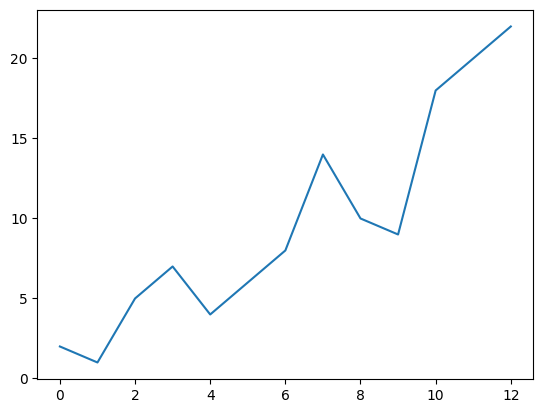

In [201]:
plt.plot(a)

For example, you can plot a 1D array like this:

In [202]:
x = np.linspace(0, 5, 20)

In [203]:
y = np.linspace(0, 10, 20)

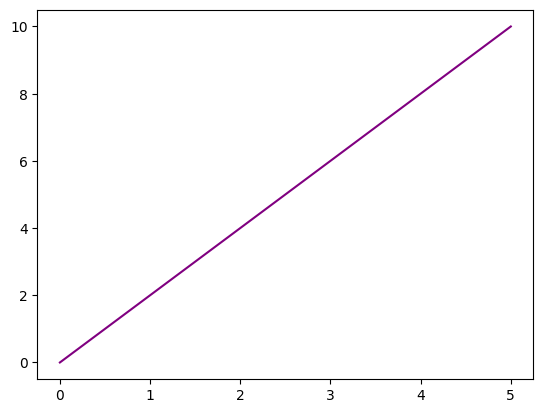

In [204]:
plt.plot(x, y, 'purple') # line

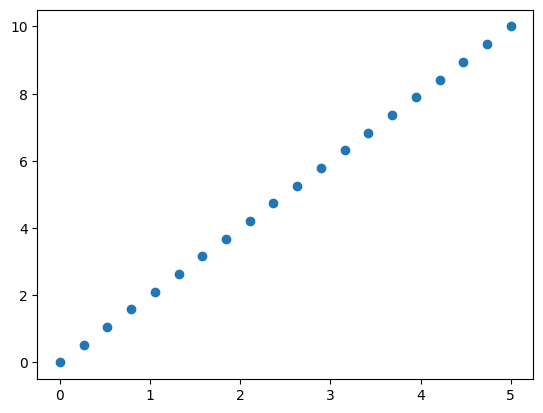

In [205]:
plt.plot(x, y, 'o')      # dots

With Matplotlib, you have access to an enormous number of visualization options.

In [206]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [207]:
ax = fig.add_subplot(projection='3d')

In [208]:
X = np.arange(-5, 5, 0.15)

In [209]:
Y = np.arange(-5, 5, 0.15)

In [210]:
X, Y = np.meshgrid(X, Y)

In [211]:
R = np.sqrt(X**2 + Y**2)

In [212]:
Z = np.sin(R)

In [218]:
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

![../_images/matplotlib3.png](img/matplotlib3.png)